In [4]:
import pandas as pd
import datetime
from datetime import datetime, date

import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('test_project.xlsx')

### Блок 1. Первичный анализ данных

In [6]:
print('Кол-во строк: ', df.shape[0])
print('Кол-во столбцов: ', df.shape[1])

Кол-во строк:  26552
Кол-во столбцов:  5


In [4]:
# Первые 5 строк датасета
df.head()

,event_type,event_properties,platform,user_id,date_event
0,link_account_start,"{""network"": ""instagram""}",Android,732723.0,2024-04-01 00:00:20.072
1,email_confirmation_page,{},Android,732328.0,2024-04-01 00:00:27.667
2,view_signup_2_personal,{},Android,732724.0,2024-04-01 00:01:53.544
3,view_signup_2_personal,{},Android,732725.0,2024-04-01 00:02:07.050
4,view_signup_3_contact,{},Android,732724.0,2024-04-01 00:03:03.845


In [9]:
# Полная информация по каждому столбцу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_type        26552 non-null  object 
 1   event_properties  26552 non-null  object 
 2   platform          26552 non-null  object 
 3   user_id           26529 non-null  float64
 4   date_event        26552 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


Итоги блока 1:

1) Общее кол-во данных составляет 26552 строк и 5 столбцов

2) Данные не имеют пропуски, предобработка данных не требуется

### Блок 2. ...

In [18]:
#datetime.datetime.strptime(df['date_event'].max(), '%Y-%m-%d %H:%M:%S.%f')
print(f"Минимальная дата и время: {df['date_event'].min()[0:-4]}") 
print(f"Максимальная дата и время: {df['date_event'].max()[0:-4]}")

Минимальная дата и время: 2024-04-01 00:00:20
Максимальная дата и время: 2024-04-10 23:56:37


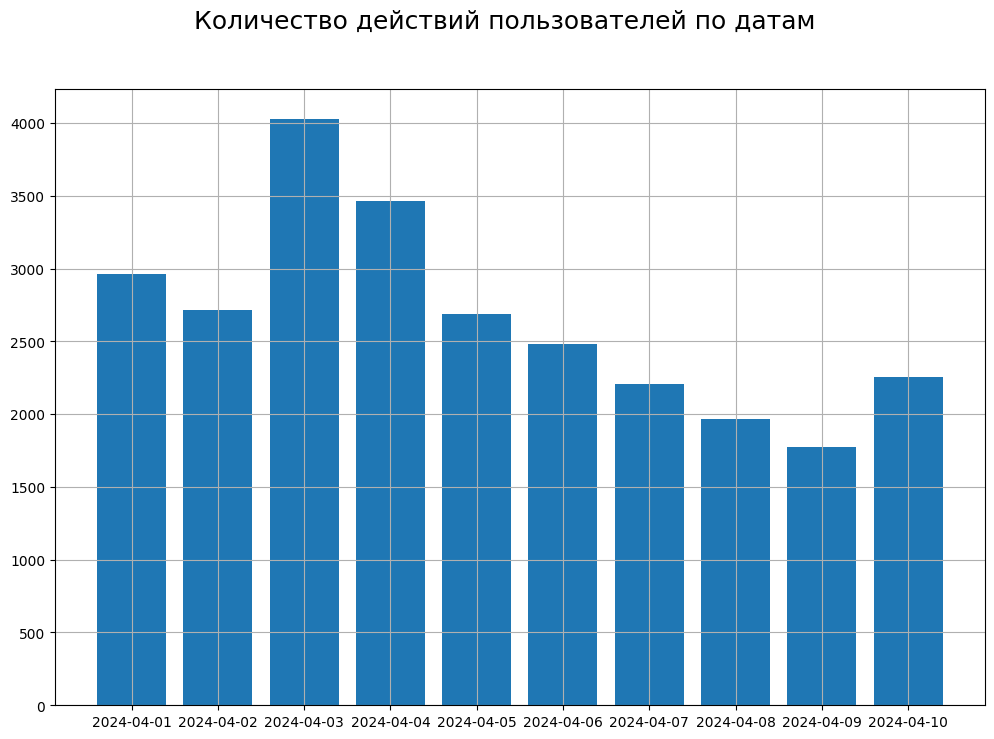

In [8]:
# Визуализация по количеству действий пользователей по датам
dates_df = df['date_event'].apply(lambda x: x[:10])

x = dates_df.groupby(dates_df).count()
y = dates_df.unique() 


fig = plt.figure(figsize=(12, 8))
fig.suptitle('Количество действий пользователей по датам', fontsize=18)
ax = fig.add_subplot()
 
#ax.hist(y)
ax.bar(y, x)
ax.grid()
 
plt.show()

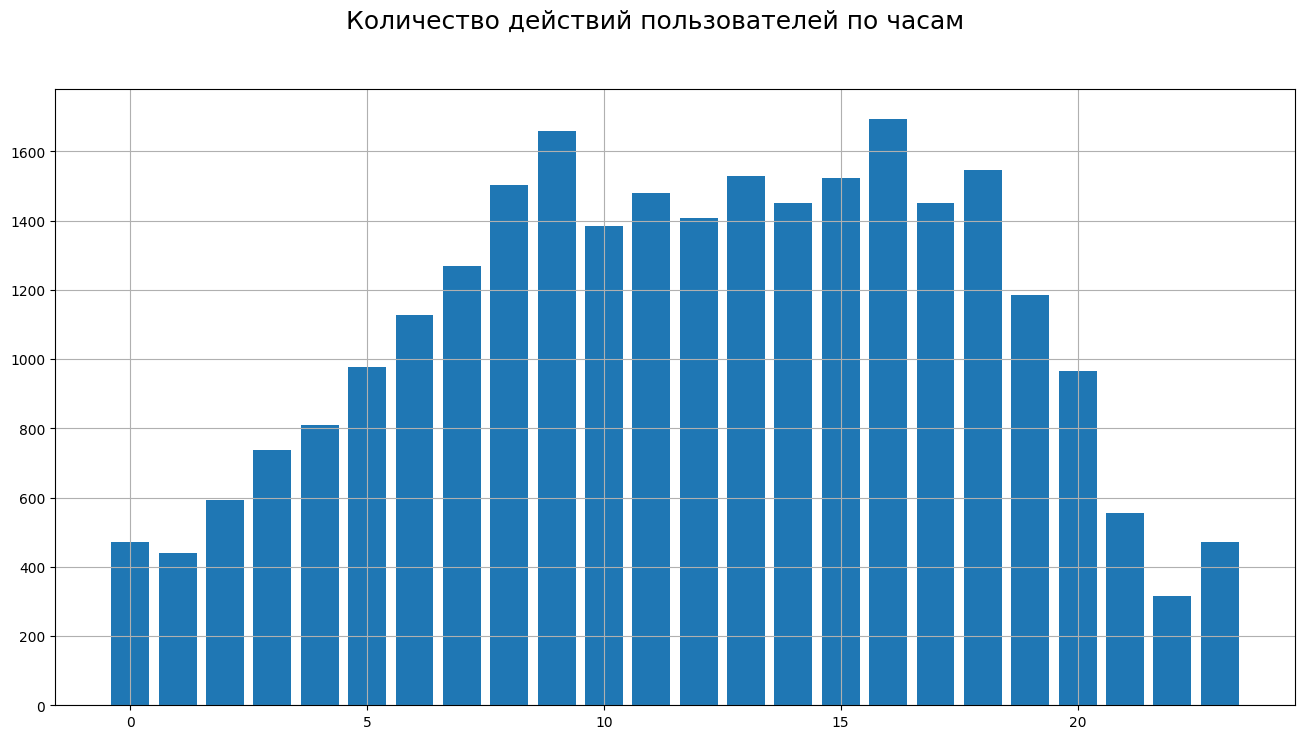

In [7]:
# Визуализация по количеству действий пользователей по часам
def times_count_event(date_event):
    hour_event = datetime.datetime.strptime(date_event, '%Y-%m-%d %H:%M:%S.%f').hour
    return hour_event

times_df = df['date_event'].apply(lambda x: times_count_event(x))

x = times_df.groupby(times_df).count()
y = times_df.unique() 


fig = plt.figure(figsize=(16, 8))
fig.suptitle('Количество действий пользователей по часам', fontsize=18)
ax = fig.add_subplot()
 
ax.bar(y, x)
ax.grid()
 
plt.show()

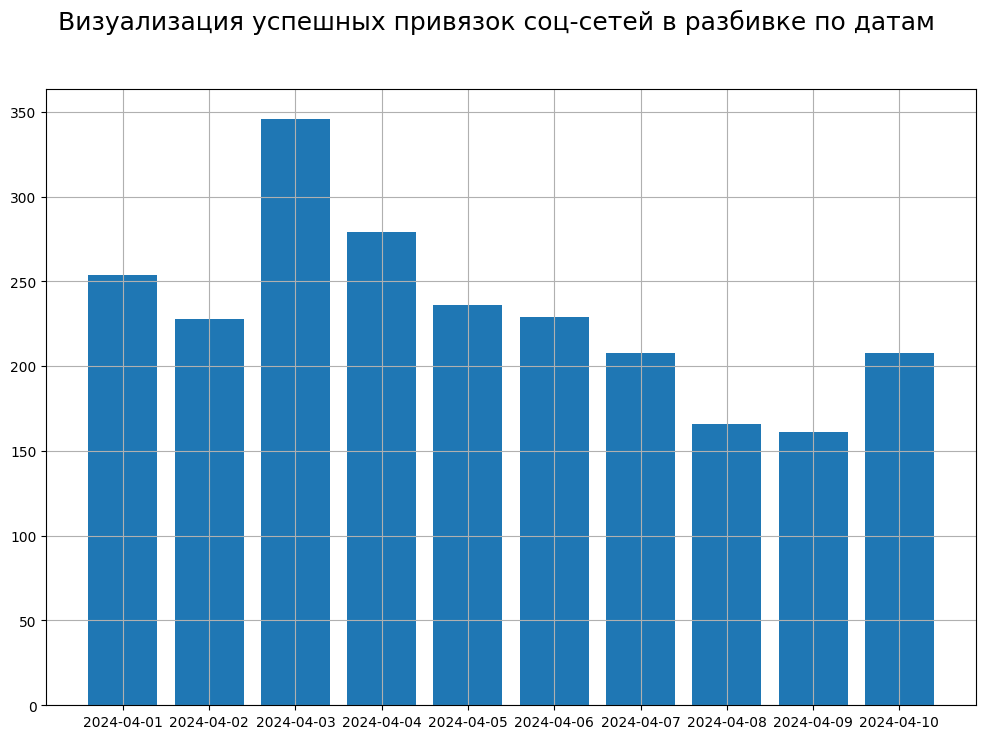

In [31]:
# Визуализация успешных привязок соц-сетей в разбивке по датам
dates_df = df[df['event_type']=='link_account_success']['date_event'].apply(lambda x: x[:10])

x = dates_df.groupby(dates_df).count()
y = dates_df.unique() 


fig = plt.figure(figsize=(12, 8))
fig.suptitle('Визуализация успешных привязок соц-сетей в разбивке по датам', fontsize=18)
ax = fig.add_subplot()
 
#ax.hist(y)
ax.bar(y, x)
ax.grid()
 
plt.show()

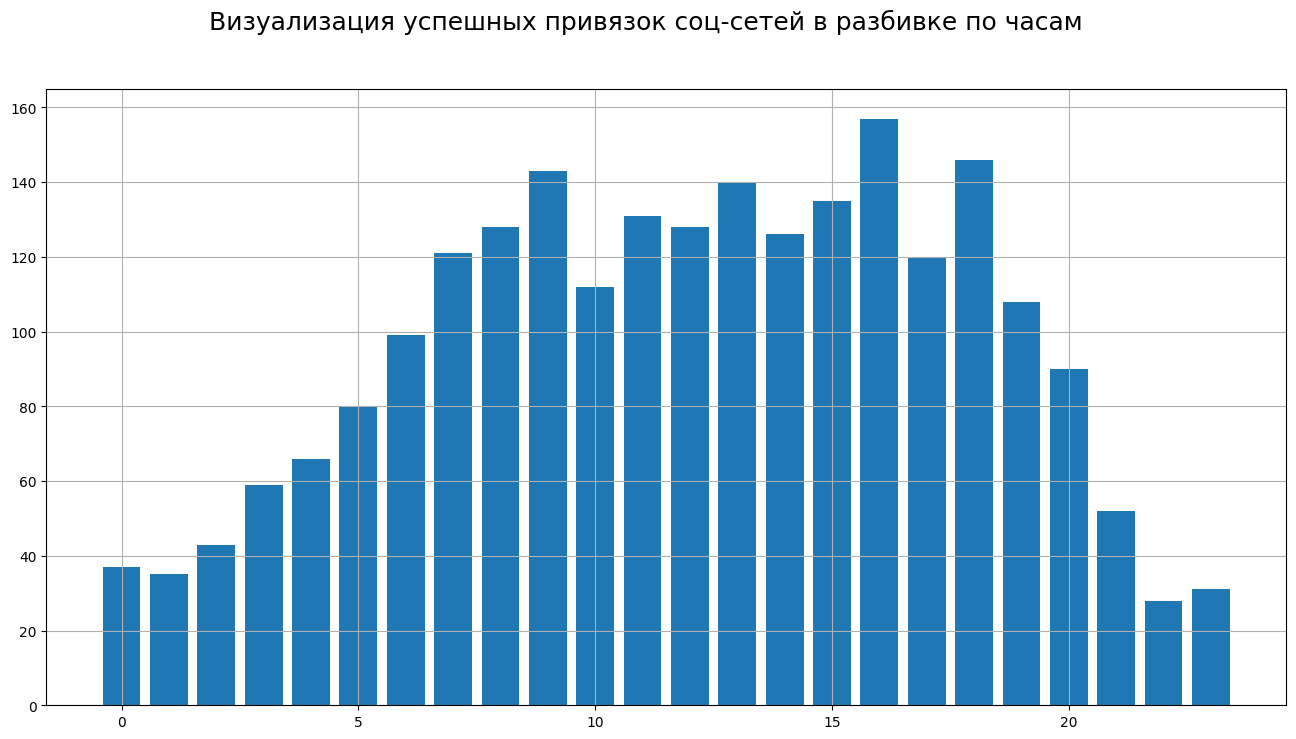

In [33]:
# Визуализация по количеству действий пользователей по часам
def times_count_event(date_event):
    hour_event = datetime.datetime.strptime(date_event, '%Y-%m-%d %H:%M:%S.%f').hour
    return hour_event

times_df = df[df['event_type']=='link_account_success']['date_event'].apply(lambda x: times_count_event(x))

x = times_df.groupby(times_df).count()
y = times_df.unique() 


fig = plt.figure(figsize=(16, 8))
fig.suptitle('Визуализация успешных привязок соц-сетей в разбивке по часам', fontsize=18)
ax = fig.add_subplot()
 
ax.bar(y, x)
ax.grid()
 
plt.show()

In [152]:
account_success.index

Index([24983, 25029,  5244,  3444,  3210,  7906,  2908, 12321, 16250,  9593,
       ...
       26462, 26473, 26479, 26489, 26496, 26503, 26512, 26525, 26535, 26542],
      dtype='int64', length=2315)

In [148]:
account_success.index-1

Index([24982, 25028,  5243,  3443,  3209,  7905,  2907, 12320, 16249,  9592,
       ...
       26461, 26472, 26478, 26488, 26495, 26502, 26511, 26524, 26534, 26541],
      dtype='int64', length=2315)

In [143]:
[i-1 for i in account_success.index]

[24982,
 25028,
 5243,
 3443,
 3209,
 7905,
 2907,
 12320,
 16249,
 9592,
 15944,
 15318,
 21095,
 11357,
 10396,
 23945,
 19211,
 16341,
 9098,
 18959,
 22816,
 1302,
 1265,
 171,
 1294,
 7661,
 11538,
 11617,
 7212,
 8016,
 13328,
 14660,
 6540,
 4440,
 16569,
 17847,
 13517,
 13552,
 21240,
 7256,
 14128,
 4143,
 17727,
 19164,
 25529,
 16237,
 18621,
 2837,
 7696,
 14188,
 10876,
 26443,
 14435,
 1298,
 16555,
 3104,
 3100,
 2990,
 9362,
 13892,
 20546,
 14234,
 7918,
 20296,
 21509,
 20778,
 23937,
 9074,
 3172,
 23510,
 12698,
 20356,
 20345,
 15443,
 17255,
 17258,
 2263,
 2464,
 16962,
 17848,
 19080,
 4204,
 15666,
 14009,
 18391,
 17592,
 23518,
 123,
 24296,
 19039,
 167,
 4355,
 7466,
 17352,
 26300,
 16769,
 18346,
 24184,
 22429,
 3947,
 22812,
 18799,
 18885,
 23056,
 20971,
 5830,
 13642,
 25163,
 7200,
 11863,
 2828,
 25294,
 5310,
 9752,
 15694,
 12474,
 18071,
 13091,
 8600,
 5197,
 18964,
 11325,
 22354,
 9142,
 4490,
 20909,
 3072,
 2975,
 18154,
 24097,
 24986,
 1

In [151]:
account_df.loc[account_success.index-1]

KeyError: '[24982, 25028, 5243, 3443, 3209, 7905, 2907, 12320, 9592, 15944, 15318, 21095, 10396, 16341, 1265, 7661, 7212, 8016, 14660, 6540, 4440, 17847, 13517, 7256, 14128, 4143, 17727, 25529, 16237, 2837, 7696, 10876, 14435, 1298, 3104, 2990, 13892, 14234, 7918, 20296, 23937, 23510, 20345, 15443, 2263, 2464, 16962, 19080, 4204, 14009, 18391, 17592, 19039, 7466, 17352, 16769, 18346, 24184, 3947, 18799, 23056, 20971, 13642, 11863, 2828, 15694, 12474, 22354, 9142, 3072, 18154, 15835, 16392, 18724, 621, 8700, 5170, 6214, 8123, 8168, 8374, 8461, 23746, 8013, 4135, 19435, 2255, 7529, 25591, 25577, 19772, 2253, 660, 2137, 2191, 2578, 2175, 4106, 611, 4984, 6355, 2679, 4280, 1574, 6245, 60, 94, 108, 191, 221, 279, 343, 336, 372, 392, 379, 400, 439, 492, 2157, 525, 519, 559, 599, 668, 3290, 723, 730, 2648, 755, 793, 852, 844, 903, 932, 6717, 1052, 1068, 1098, 1123, 1166, 1397, 1227, 9244, 1278, 1321, 1835, 1372, 1394, 1427, 8530, 1511, 1597, 1567, 1614, 1909, 1762, 1709, 1719, 1760, 1732, 1765, 1847, 8522, 1867, 1905, 1951, 1994, 2025, 2038, 2068, 2120, 2152, 2196, 2201, 2229, 2233, 2344, 2273, 2302, 2322, 2346, 2402, 2489, 2517, 2620, 2599, 2635, 14702, 2699, 2709, 2743, 2726, 2758, 2766, 2778, 2808, 3061, 3213, 3296, 3313, 3335, 3359, 3383, 3396, 3438, 3435, 3469, 3459, 3477, 3515, 3580, 3658, 3590, 3839, 3606, 13408, 3715, 3755, 3709, 3734, 4844, 3785, 3801, 3803, 4006, 3940, 3958, 3965, 3967, 4025, 4037, 4070, 8563, 4156, 4209, 4244, 4254, 4300, 4348, 7044, 4402, 4463, 4476, 7030, 5676, 4507, 4551, 8447, 4609, 4619, 9088, 6601, 4714, 4704, 4745, 4807, 4826, 4872, 4878, 4968, 5033, 6076, 5046, 5059, 6259, 5098, 5797, 5186, 5272, 21766, 5330, 7305, 5442, 5452, 5464, 5493, 5920, 5611, 5657, 5683, 5715, 5727, 5724, 5746, 5892, 6186, 7288, 6037, 6081, 6253, 6193, 6210, 6237, 13802, 19573, 6378, 6394, 6491, 6724, 6573, 6649, 6711, 6763, 6876, 6851, 6895, 6922, 6898, 6929, 6939, 6946, 6965, 7009, 6985, 7068, 7095, 7368, 7108, 7159, 7191, 7275, 7285, 7450, 7459, 7499, 7585, 7617, 7649, 7726, 7774, 7790, 7794, 7802, 7823, 7827, 7842, 7837, 7890, 7907, 7925, 12163, 7951, 7971, 7985, 8107, 8116, 8141, 8166, 8208, 8245, 8252, 8293, 8271, 8329, 8346, 8364, 8402, 8443, 8436, 8485, 8473, 8527, 8602, 8623, 8635, 8691, 8724, 8775, 8810, 8823, 11176, 8852, 8848, 9523, 16903, 8949, 8971, 9153, 9002, 9026, 9043, 9064, 9070, 11654, 9135, 11949, 9315, 9186, 9201, 9207, 9257, 9268, 12837, 9290, 9303, 9376, 9400, 9437, 9455, 9541, 10394, 9615, 9689, 9666, 9693, 9761, 10386, 9802, 10652, 13980, 9903, 16654, 9975, 9988, 10041, 10006, 10079, 16472, 10086, 10178, 10221, 10213, 10260, 10323, 10404, 10415, 10417, 10424, 10433, 10471, 10548, 11860, 10644, 10520, 10552, 10542, 10594, 18100, 10864, 10675, 10795, 10752, 10762, 10786, 10768, 10774, 10956, 10832, 10873, 12137, 11890, 11072, 10962, 13509, 10987, 11281, 11195, 11163, 11232, 11247, 11574, 11382, 11402, 11443, 13498, 11464, 11483, 11540, 11599, 11594, 11702, 11695, 11706, 11725, 11737, 11739, 11786, 11815, 11850, 11837, 11879, 11909, 11905, 15028, 16744, 12064, 12001, 12024, 12106, 12108, 12121, 12143, 17504, 12153, 12203, 12213, 12229, 12232, 12295, 12304, 12346, 12375, 17371, 12704, 12429, 12451, 12470, 12449, 12495, 12558, 12594, 12607, 12644, 12669, 12658, 12709, 19552, 12849, 14442, 12783, 12895, 12964, 12962, 12984, 13016, 13037, 13081, 15227, 13140, 13211, 13187, 13254, 13314, 13331, 13429, 13436, 13472, 13484, 13590, 13554, 16640, 13773, 13699, 15198, 13726, 13740, 13756, 13762, 13781, 14021, 13867, 13918, 13922, 13935, 16772, 13970, 13996, 14016, 14070, 18643, 17085, 14179, 14251, 14295, 14497, 14460, 14521, 21642, 14529, 14503, 14540, 16324, 16362, 14552, 14602, 14638, 16432, 14645, 14768, 14957, 14742, 14758, 14817, 14834, 14867, 14949, 15001, 14988, 15122, 17366, 15187, 15201, 15263, 15246, 15329, 15283, 15347, 15409, 16557, 15635, 15647, 15731, 15708, 15748, 15765, 15783, 15855, 15936, 16269, 16100, 16127, 16138, 16302, 16373, 16368, 16330, 16352, 16521, 16486, 16517, 16575, 16652, 16711, 16716, 16847, 16857, 16887, 16929, 17324, 17067, 17172, 17135, 17147, 17192, 17163, 17322, 17456, 22083, 17420, 18688, 17588, 17615, 17623, 17634, 17658, 17653, 20743, 17680, 17697, 17747, 17785, 17823, 17815, 17809, 17893, 17985, 17969, 17977, 18008, 20353, 18121, 18149, 18320, 18355, 20282, 20659, 18600, 18623, 18625, 23838, 18767, 18776, 18790, 19296, 18835, 19065, 18852, 18858, 18904, 18914, 18945, 18974, 19005, 19213, 19143, 19126, 19108, 19141, 19593, 19235, 19249, 19425, 19355, 19362, 19395, 19415, 19467, 19446, 19478, 19522, 20041, 21636, 19704, 19741, 19757, 19805, 19954, 19782, 19786, 19869, 19844, 19865, 19892, 19932, 20009, 19983, 20044, 20014, 20071, 20102, 20097, 20155, 20246, 20280, 20191, 20208, 20229, 20234, 20290, 20300, 20401, 24248, 23655, 20471, 20477, 25496, 25300, 25356, 20655, 24977, 20737, 23336, 22314, 20932, 21037, 21008, 21047, 21069, 21097, 21103, 21263, 21300, 21313, 21401, 21531, 21491, 21512, 21526, 21631, 21661, 21698, 21704, 21749, 21759, 21851, 21894, 21955, 22045, 22067, 22091, 22119, 22143, 22152, 22182, 22175, 22212, 22321, 22387, 22396, 22417, 22413, 22624, 22660, 22686, 22782, 22785, 23812, 25487, 22878, 22966, 22909, 23007, 22927, 22995, 23778, 23111, 23176, 23157, 23189, 23172, 23267, 23241, 23273, 23288, 24259, 23364, 23368, 23406, 23443, 24631, 23501, 23578, 23553, 23589, 23607, 23643, 23680, 23830, 23843, 25091, 23897, 23887, 24064, 24024, 24042, 24077, 24103, 24583, 24134, 24160, 24177, 24168, 24331, 24342, 24516, 24706, 24509, 24726, 24556, 24570, 24575, 24619, 24650, 24689, 24714, 24775, 24808, 24823, 24879, 25082, 25087, 25099, 25123, 25182, 25276, 25289, 25427, 25552, 25418, 25491, 25568, 25664, 25626, 25738, 25820, 25830, 25867, 25965, 25978, 26100, 26028, 26054, 26097, 26120, 26134, 26271, 26292, 26182, 26223, 26281, 26288, 26307, 26319, 26349, 26379, 26395] not in index'

In [137]:
account_success

,event_type,event_properties,platform,user_id,date_event
24983,link_account_success,"{""network"": ""instagram""}",iOS,2231.0,2024-04-10 09:53:21.117
25029,link_account_success,"{""network"": ""instagram""}",iOS,42889.0,2024-04-10 10:26:19.424
5244,link_account_success,"{""network"": ""telegram""}",iOS,50317.0,2024-04-02 19:22:02.301
3444,link_account_success,"{""network"": ""vk""}",iOS,90045.0,2024-04-02 07:18:25.034
3210,link_account_success,"{""network"": ""youtube""}",Android,99425.0,2024-04-02 05:09:36.318
...,...,...,...,...,...
26503,link_account_success,"{""network"": ""instagram""}",Android,738529.0,2024-04-10 21:00:49.293
26512,link_account_success,"{""network"": ""instagram""}",iOS,738530.0,2024-04-10 21:10:21.817
26525,link_account_success,"{""network"": ""instagram""}",Android,738534.0,2024-04-10 21:30:40.551
26535,link_account_success,"{""network"": ""instagram""}",iOS,738545.0,2024-04-10 22:49:33.232


In [112]:
account_success = account_df[account_df['event_type']=='link_account_success']
account_df.iloc[account_success.index]

IndexError: positional indexers are out-of-bounds

In [63]:
# Подсчет среднего времени успешной привязки соц-сети после начала привязки по всем юзерам
account_df = df[df['event_type'].isin(['link_account_success', 'link_account_start'])]
account_df = account_df.sort_values(['user_id', 'event_properties', 'date_event'])#.iloc[:20]

In [85]:
def time_difference_func(x, y):
    time_end = datetime.datetime.strptime(y, '%Y-%m-%d %H:%M:%S.%f')
    time_start = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    return (time_end - time_start).total_seconds()


account_df['time difference'] = np.where(
    (account_df['event_type'].shift(-1)=='link_account_start') & \
    (account_df['event_type']=='link_account_success') & \
    (account_df['event_properties'] == account_df['event_properties'].shift(-1)) & \
    (account_df['user_id'] == account_df['user_id'].shift(-1)),
    time_difference_func(account_df['date_event'], account_df['date_event'].shift(-1)), np.nan)

TypeError: strptime() argument 1 must be str, not Series

In [83]:
df

,event_type,event_properties,platform,user_id,date_event
0,link_account_start,"{""network"": ""instagram""}",Android,732723.0,2024-04-01 00:00:20.072
1,email_confirmation_page,{},Android,732328.0,2024-04-01 00:00:27.667
2,view_signup_2_personal,{},Android,732724.0,2024-04-01 00:01:53.544
3,view_signup_2_personal,{},Android,732725.0,2024-04-01 00:02:07.050
4,view_signup_3_contact,{},Android,732724.0,2024-04-01 00:03:03.845
...,...,...,...,...,...
26547,view_signup_3_contact,{},Android,738549.0,2024-04-10 23:50:36.561
26548,signup_successful,{},Android,738549.0,2024-04-10 23:50:47.180
26549,link_account_start,"{""network"": ""tiktok""}",Android,738549.0,2024-04-10 23:50:57.942
26550,link_account_start,"{""network"": ""vk""}",Android,738549.0,2024-04-10 23:51:31.695


In [68]:
datetime.combine('2024-04-10 09:31:23.451', exit) - datetime.combine('2024-04-10 09:53:21.117', enter)

AttributeError: module 'datetime' has no attribute 'combine'

In [82]:
time_start = datetime.datetime.strptime('2024-04-10 09:31:23.451', '%Y-%m-%d %H:%M:%S.%f')#.time()
time_end = datetime.datetime.strptime('2024-04-10 09:53:21.117', '%Y-%m-%d %H:%M:%S.%f')#.time()


print((time_end - time_start).total_seconds())
print((time_end - time_start).total_seconds()/60)
print((time_end - time_start).total_seconds()/3600)


1317.666
21.9611
0.36601833333333333


In [71]:
time_end - time_start

datetime.timedelta(days=-1, seconds=85082, microseconds=334000)

In [65]:
account_df.iloc[:20]

,event_type,event_properties,platform,user_id,date_event
469,link_account_start,"{""network"": ""vk""}",iOS,1970.0,2024-04-01 06:02:22.041
24960,link_account_start,"{""network"": ""instagram""}",iOS,2231.0,2024-04-10 09:31:23.451
24983,link_account_success,"{""network"": ""instagram""}",iOS,2231.0,2024-04-10 09:53:21.117
21335,link_account_start,"{""network"": ""telegram""}",Android,6338.0,2024-04-08 11:09:15.817
21342,link_account_start,"{""network"": ""vk""}",Android,6338.0,2024-04-08 11:14:24.618
10889,link_account_start,"{""network"": ""youtube""}",iOS,14089.0,2024-04-04 09:00:06.962
24294,link_account_start,"{""network"": ""instagram""}",Android,30470.0,2024-04-09 23:25:00.134
4629,link_account_start,"{""network"": ""instagram""}",iOS,31365.0,2024-04-02 15:25:37.983
4630,link_account_start,"{""network"": ""youtube""}",iOS,31365.0,2024-04-02 15:26:03.406
21289,link_account_start,"{""network"": ""pinterest""}",iOS,39065.0,2024-04-08 10:43:59.496


In [26]:
print(len(df[df['event_type']=='link_account_success']['user_id'].unique()))
print(len(df[df['event_type']=='link_account_start']['user_id'].unique()))

2245
3797


In [15]:
print(len(df.user_id.unique()))

4995


- Время
1) Визуализация успешных привязок соц-сетей в разбивке по датам
2) Визуализация успешных привязок соц-сетей в разбивке по часам
3) Визуализация начала привязок соц-сетей в разбивке по датам
4) Визуализация начала привязок соц-сетей в разбивке по часам
5) Среднее время успешной привязки соц-сети после начала привязки по всем юзерам
- ОС

1) Распределение ОС по пользователям
2) Распределение ОС по кол-ву успешных привязок сетей
3) Соц-сети в разбивке по ОС (2 круговых диаграммы)

- Юзеры
1) Кол-во уникальных юзеров
2) Пользователи с успешно привязанными соц-сетями
3) Посмотреть юзеров, которые по каким-то причинам начали привязывать, но не закончили

- Соц-сети
1) Распределение цсоц-сетей

In [115]:
str({"network": "vk"}).split(':')[1][2:-2]

'vk'

In [116]:

str({"network": "instagram"}).split(':')[1][2:-2]

'instagram'